Expectativa de vida

Se toma una muestra para calcular la expectativa de las personas de acuerdo a sus paises.


https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated

# Librerias

In [1]:
import numpy as np
import pandas as pd

# Cargamos Informacíon

In [10]:
# Cargamos la informacion desde un archivo csv y generamos un dataframe
df_concrete = pd.read_csv('./data/Life_Expectancy_Data.csv')

In [11]:
# eliminar espacios y pasar nombres a minusculas de las columnas
df_concrete.columns = df_concrete.columns.str.strip().str.lower().str.replace(' ', '_')

# EDA

In [ ]:
df_concrete.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Informacion de data frame
df_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

DataFrame con mas de 2900 registros

In [ ]:
#infromacion de los valores estadisticos
df_concrete.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
#Identificamos valores nulos en el dataframe
df_concrete.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [ ]:
# Identificamos % de valores nulos en el dataframe
df_concrete.isnull().mean() * 100
# 15 % de valores nulos en la columnas

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.340368
adult_mortality                     0.340368
infant_deaths                       0.000000
alcohol                             6.603131
percentage_expenditure              0.000000
hepatitis_b                        18.822328
measles                             0.000000
bmi                                 1.157250
under-five_deaths                   0.000000
polio                               0.646698
total_expenditure                   7.692308
diphtheria                          0.646698
hiv/aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness__1-19_years                1.157250
thinness_5-9_years                  1.157250
income_composition_of_resources     5.684139
schooling                           5.547992
dtype: flo

In [13]:
#Eliminamos registros donde no se tiene ninguna expectativa de vida
df_cleaned_target = df_concrete.dropna(subset=['life_expectancy'])

In [14]:
# verificamos los valores unicos en las columnas categoricas
df_cleaned_target.select_dtypes(include=['object']).nunique()

country    183
status       2
dtype: int64

In [15]:
# Visualizamos los valores categoricos
for col in df_cleaned_target.select_dtypes(include=['object']).columns:
    print(col)
    print(df_cleaned_target[col].unique()[:10])
    print(df_cleaned_target[col].nunique())
    print()

country
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan']
183

status
['Developing' 'Developed']
2



In [16]:
#Identificamos los años de información
df_cleaned_target.year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [17]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Life Expectancy over Years'}, xlabel='Year', ylabel='Life Expectancy'>

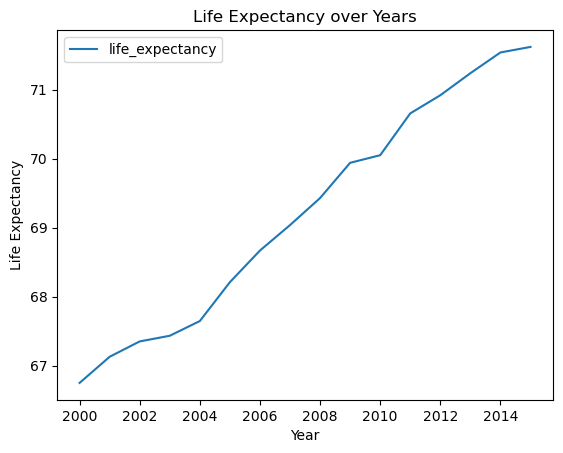

In [18]:
#pivot entre years y media de life_expectancy
df_pivot = df_cleaned_target.pivot_table(values='life_expectancy', index='year', aggfunc='mean')
df_pivot.plot(title='Life Expectancy over Years', ylabel='Life Expectancy', xlabel='Year')

<Axes: title={'center': 'Life Expectancy over Years by Status'}, xlabel='Year', ylabel='Life Expectancy'>

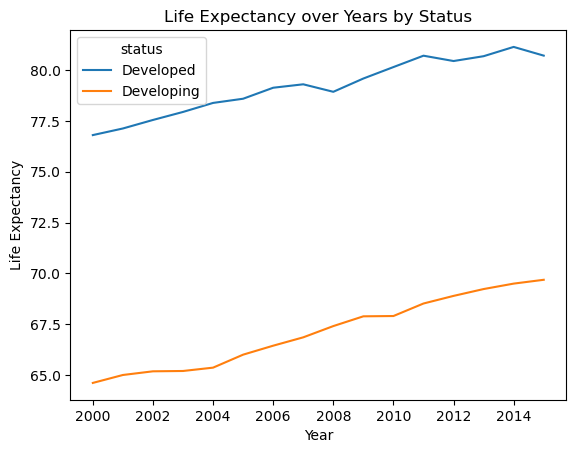

In [19]:
#pivot entre years y media de life_expectancy agrupdatos por status
df_pivot = df_cleaned_target.pivot_table(values='life_expectancy', index='year', columns='status', aggfunc='mean')
df_pivot.plot(title='Life Expectancy over Years by Status', ylabel='Life Expectancy', xlabel='Year')

<Axes: xlabel='life_expectancy', ylabel='Count'>

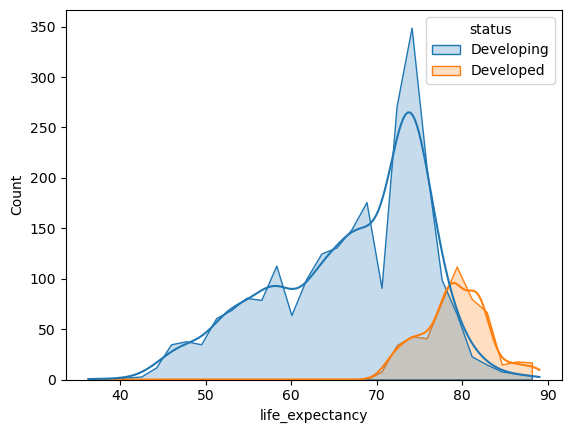

In [20]:
#sns.histplot(df_pivot['life_expectancy'], kde=True, hue='status')

sns.histplot(data=df_cleaned_target,x='life_expectancy',hue='status', kde=True,element='poly')

<Axes: title={'center': 'Life Expectancy over Years by Status'}, xlabel='Year', ylabel='Life Expectancy'>

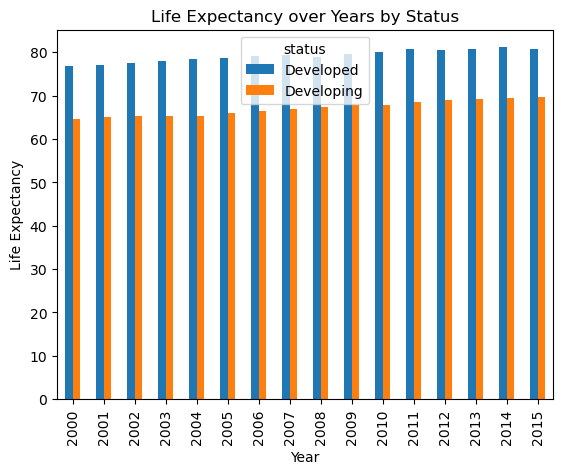

In [21]:
# Grafica plotbar 
df_pivot.plot(kind='bar', title='Life Expectancy over Years by Status', ylabel='Life Expectancy', xlabel='Year')

<Axes: title={'center': 'Infant Deaths over Years by Status'}, xlabel='Year', ylabel='Infant Deaths'>

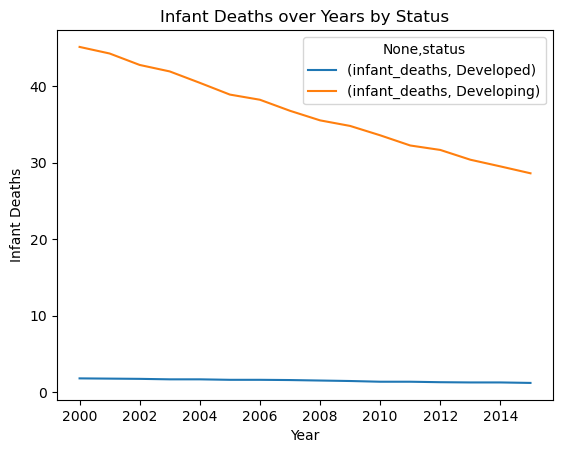

In [22]:
#pivot entre years y media de infant_deaths agrupdatos por status
df_pivot = df_cleaned_target.pivot_table(values=['infant_deaths'], index='year', aggfunc='mean', columns='status')
df_pivot.plot(title='Infant Deaths over Years by Status', ylabel='Infant Deaths', xlabel='Year')

<Axes: title={'center': 'Population over Years by Status'}, xlabel='Year', ylabel='Population'>

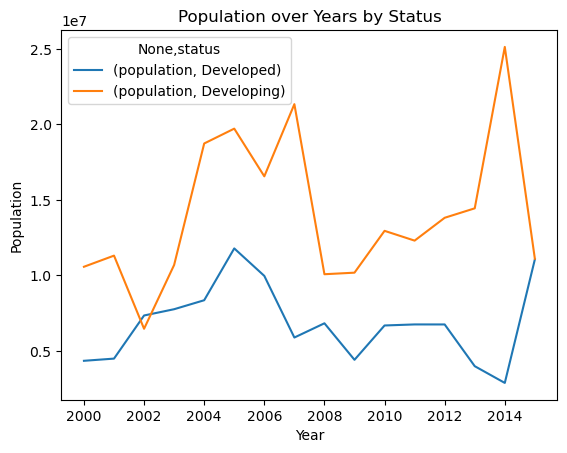

In [23]:
#pivot entre years y media de population agrupdatos por status
df_pivot = df_cleaned_target.pivot_table(values=['population'], index='year', aggfunc='mean', columns='status')
df_pivot.plot(title='Population over Years by Status', ylabel='Population', xlabel='Year')

In [24]:
# Dataframe por status
df_cleaned_target_status_deved = df_cleaned_target[df_cleaned_target['status']=='Developed']
df_cleaned_target_status_deving = df_cleaned_target[df_cleaned_target['status']=='Developing']

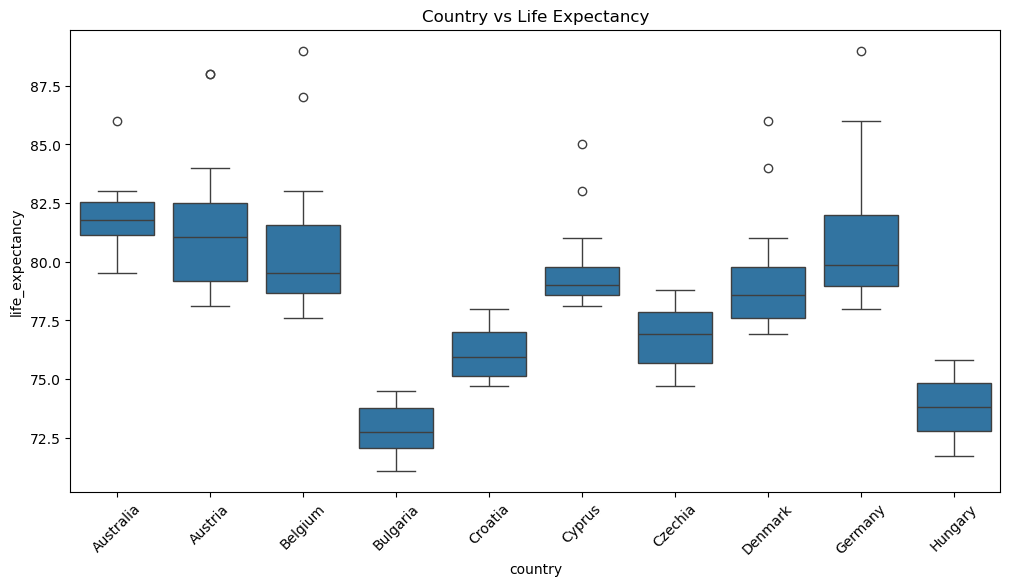

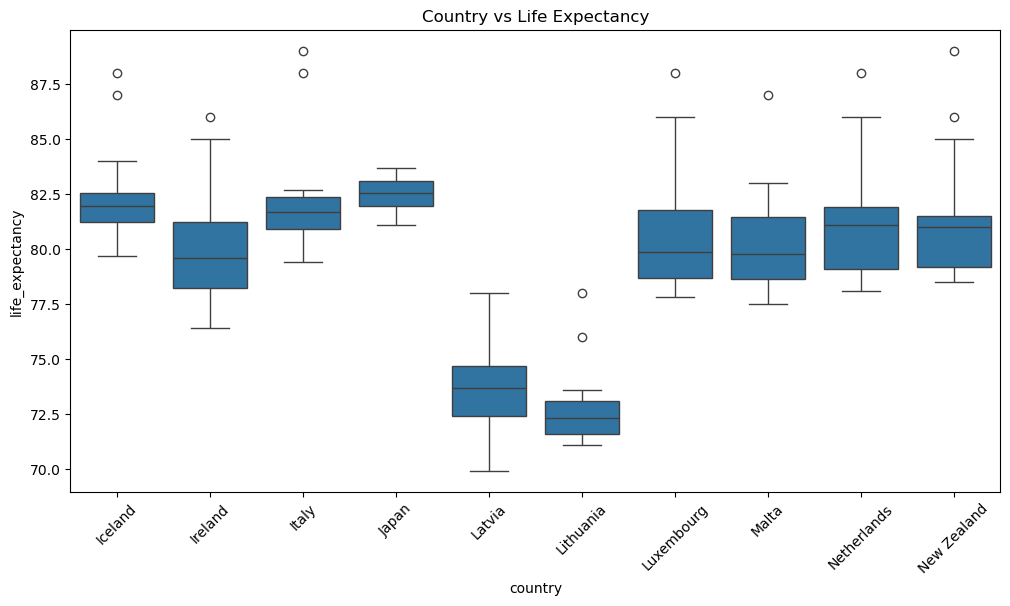

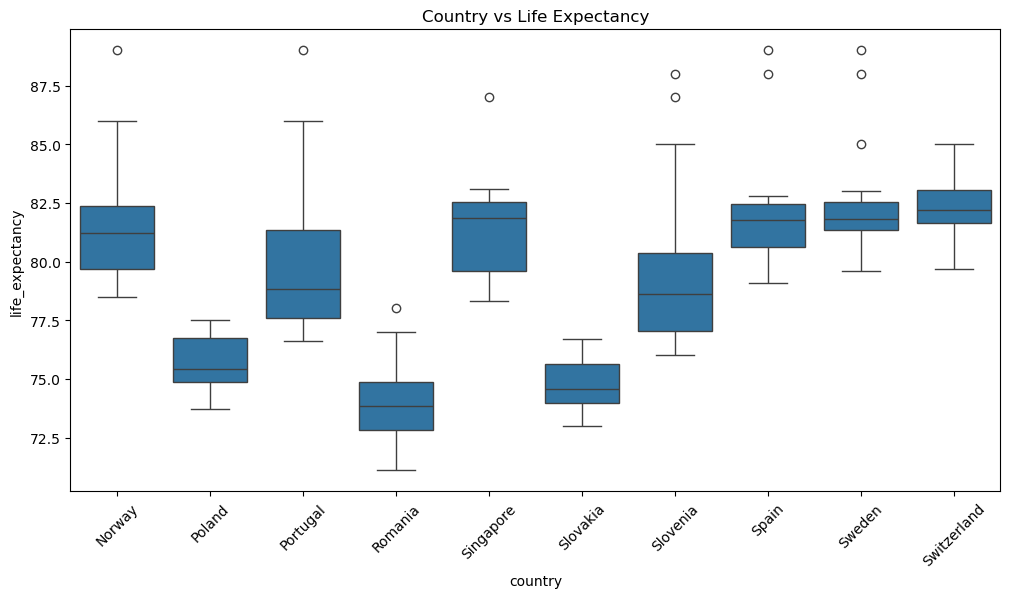

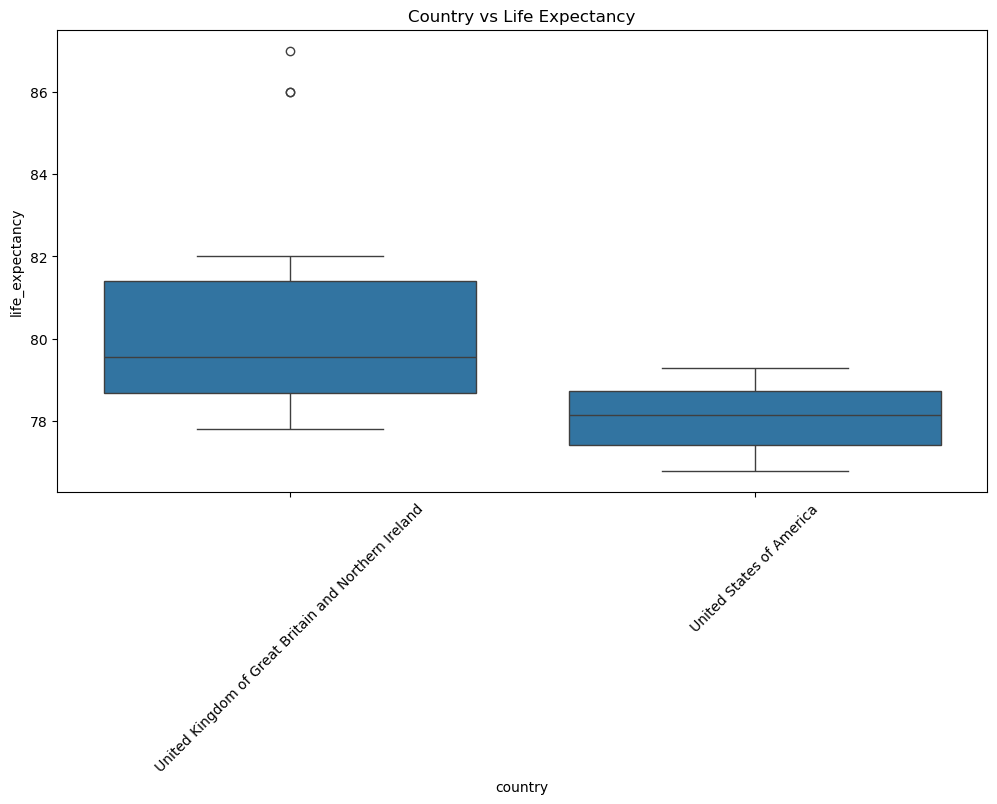

In [25]:
#Listado de paises unicos
#Iteraramos de 5 paises por grafica
countries = df_cleaned_target_status_deved.country.unique()

for i in range(0, len(countries), 10):
    plt.figure(figsize=(12, 6))
    subset_countries = countries[i:i+10]
    subset_data = df_cleaned_target_status_deved[df_cleaned_target_status_deved['country'].isin(subset_countries)]
    sns.boxplot(x='country', y='life_expectancy', data=subset_data)
    plt.title('Country vs Life Expectancy')
    plt.xticks(rotation=45)
    plt.show()

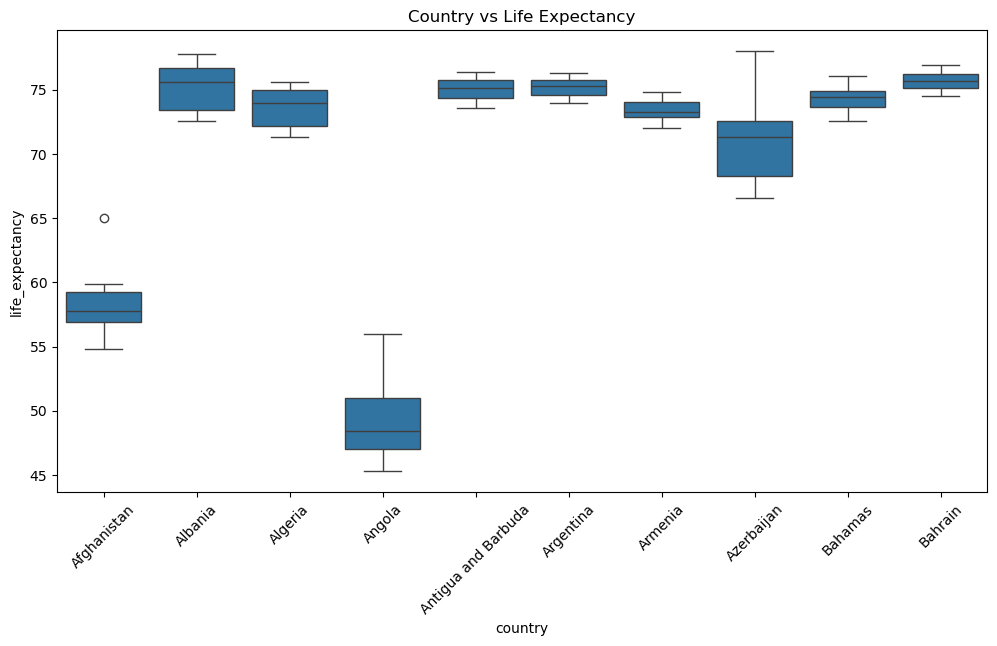

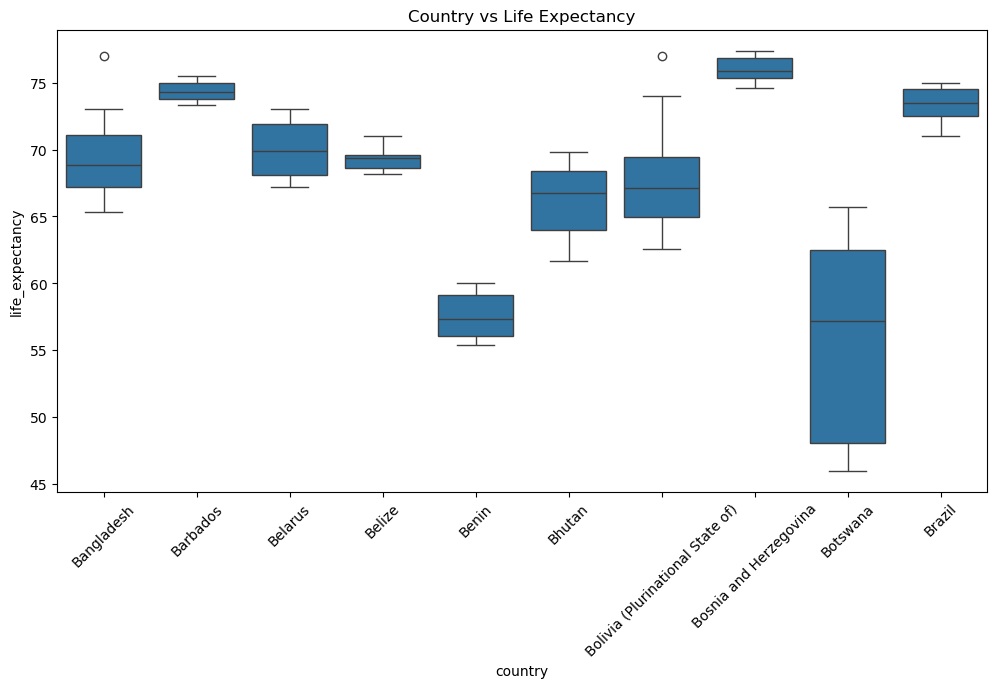

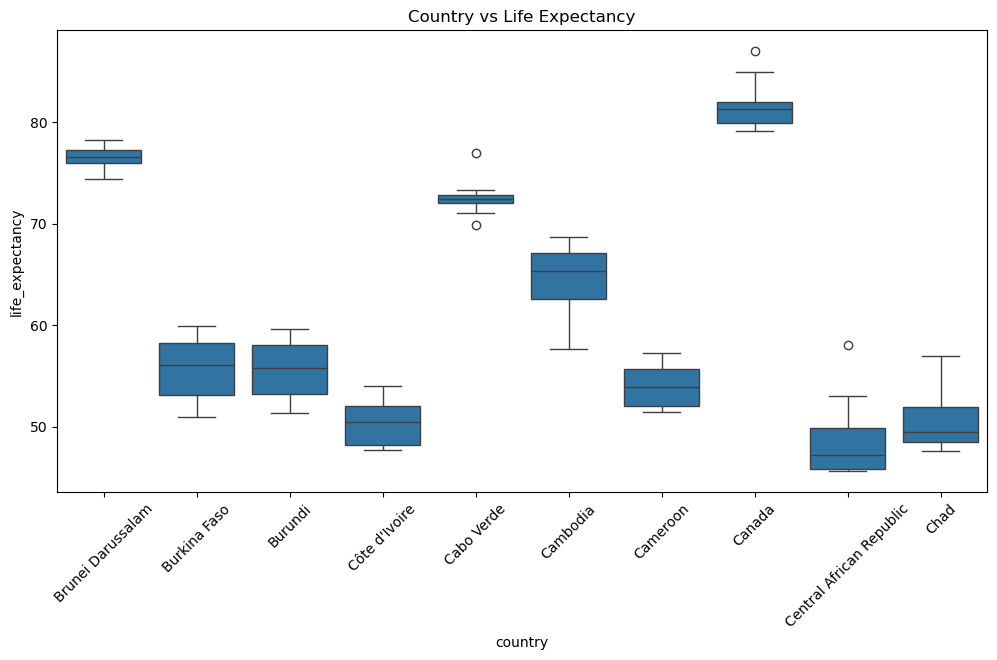

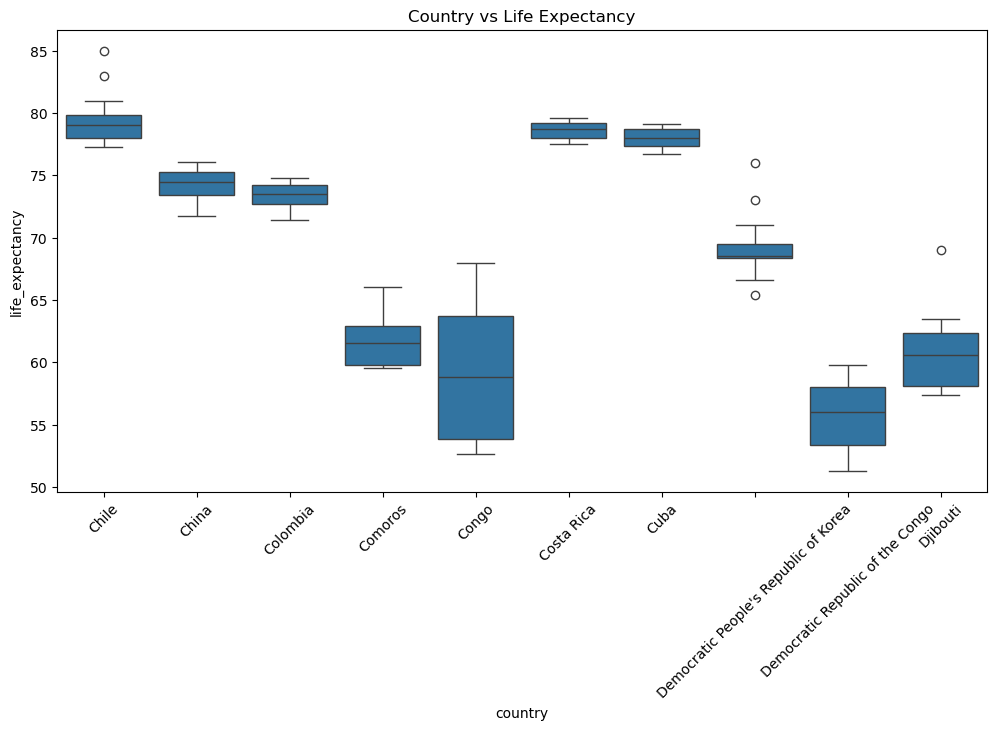

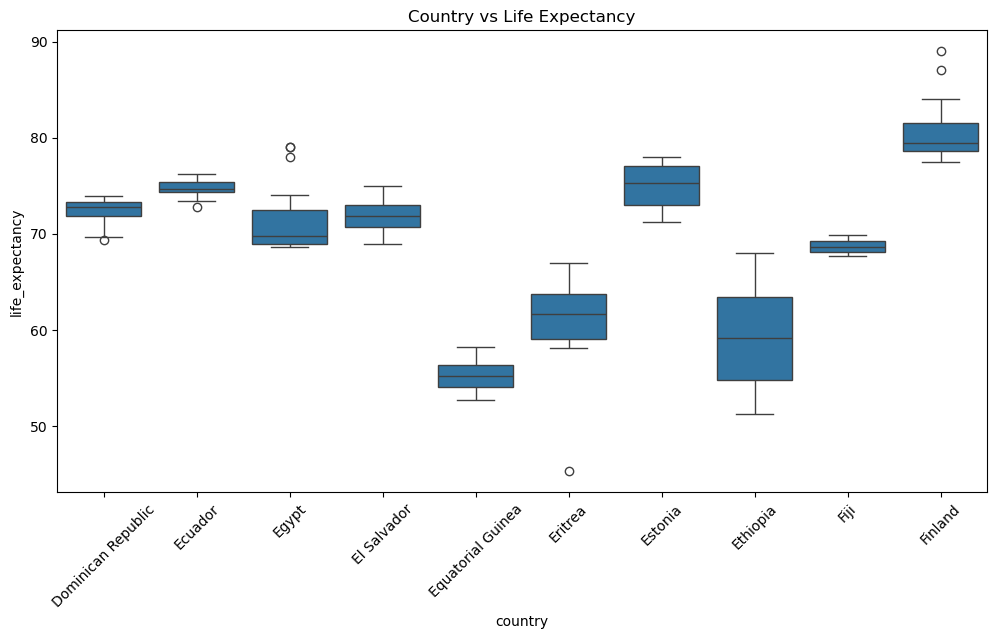

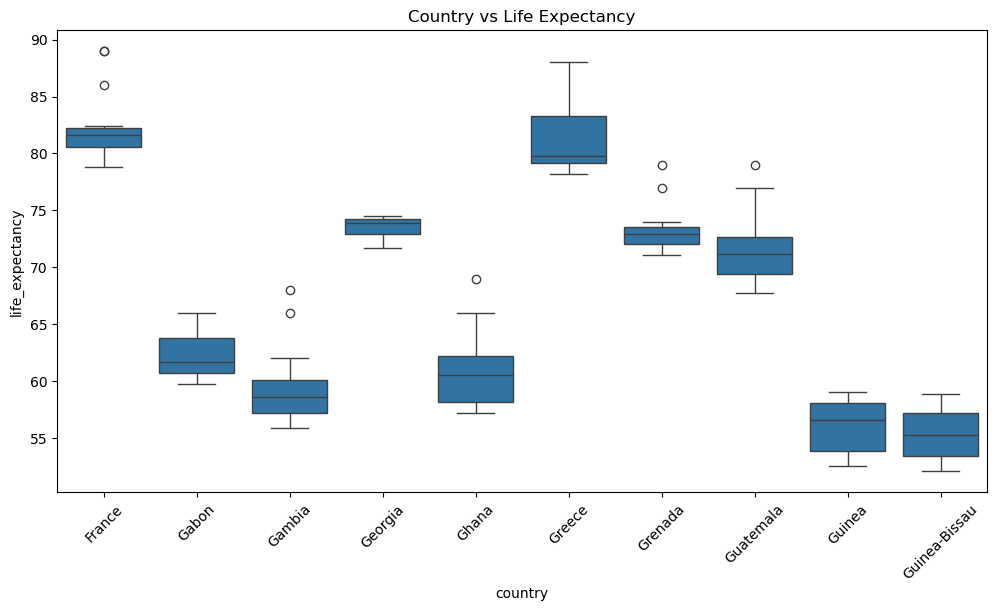

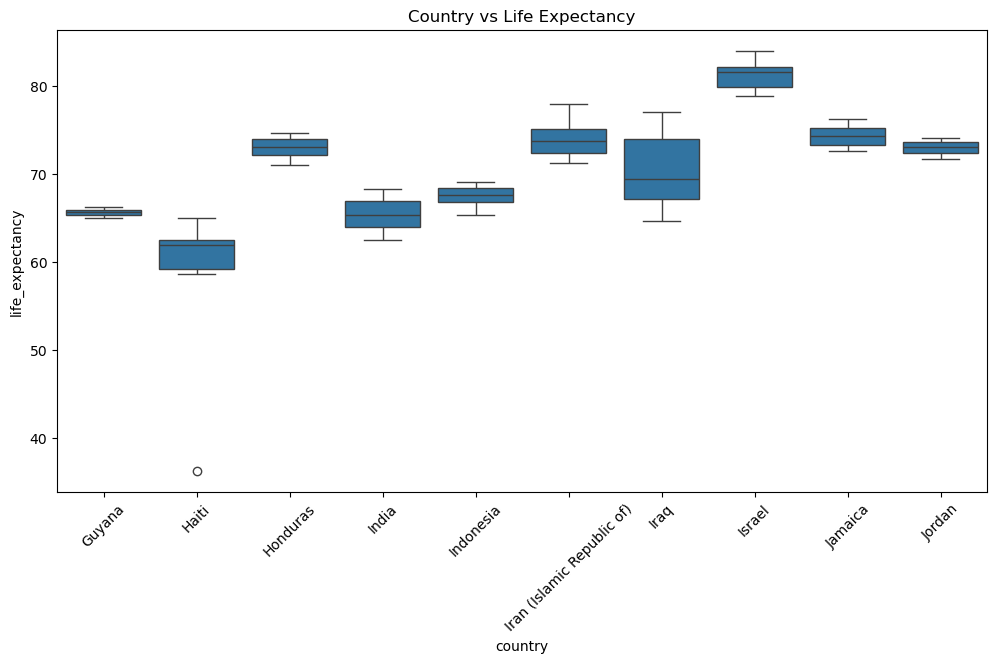

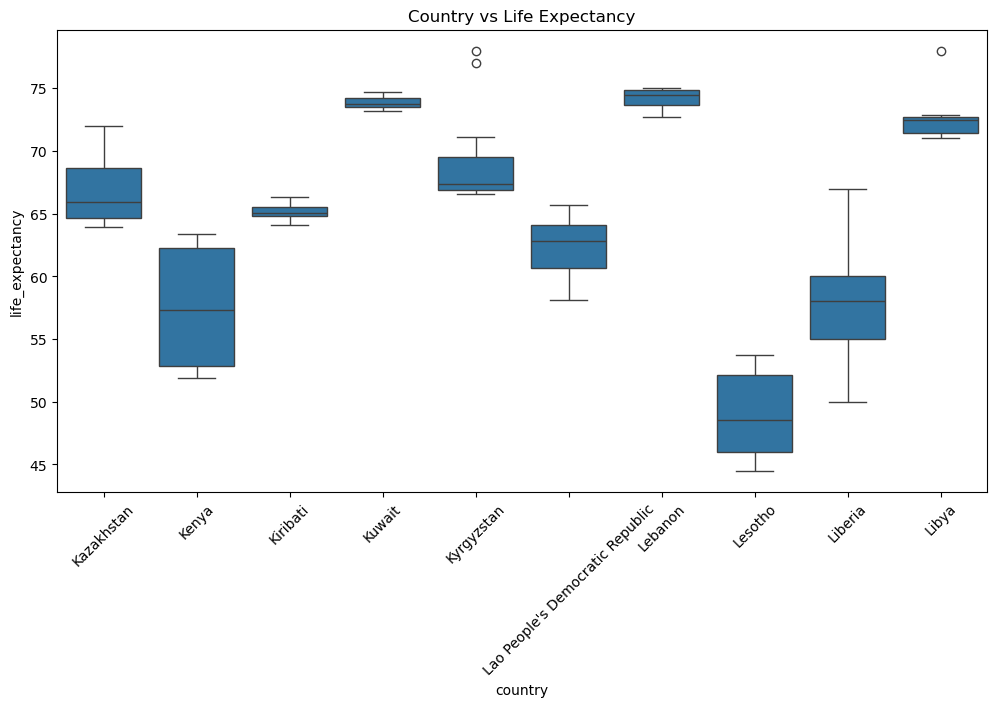

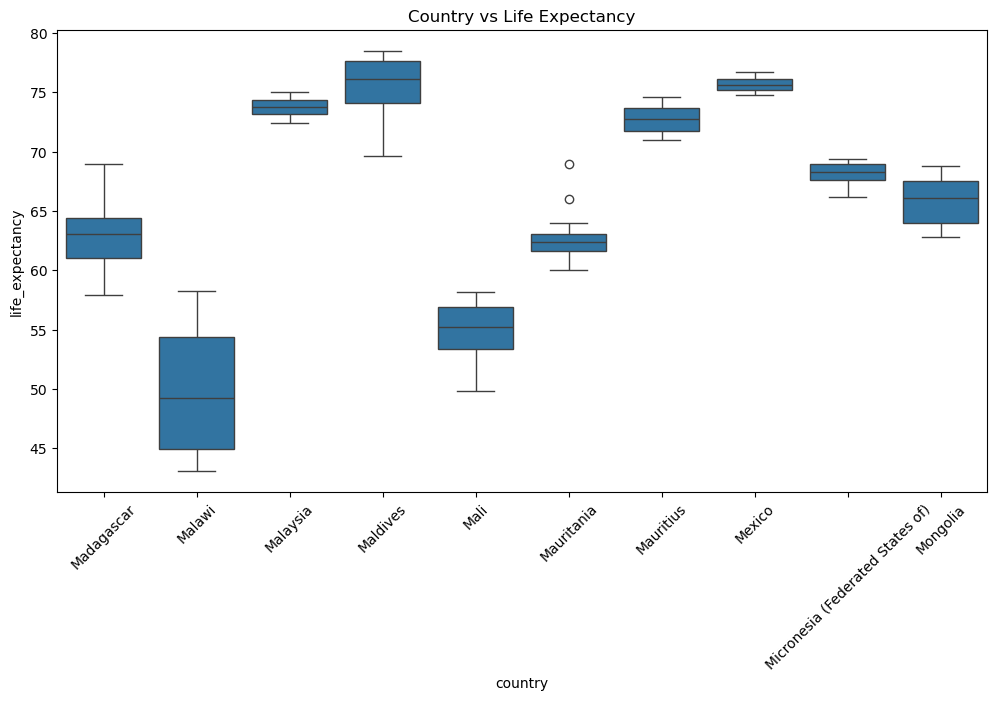

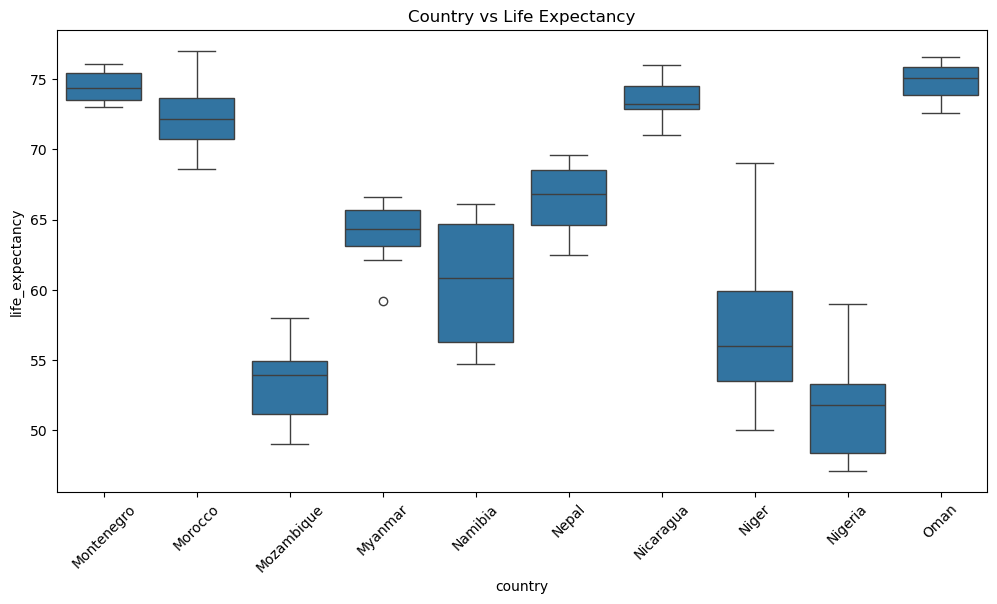

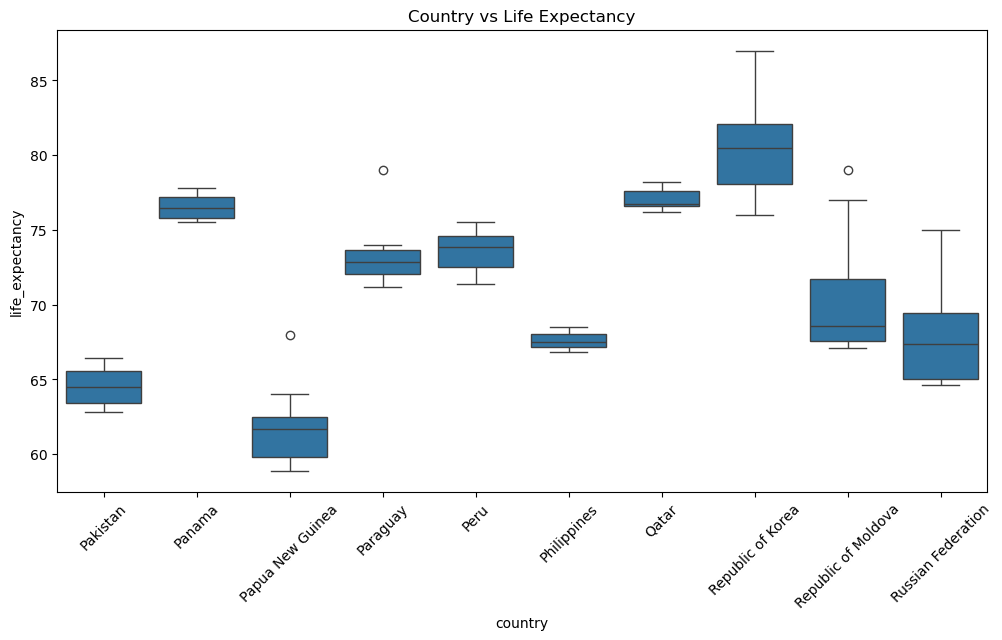

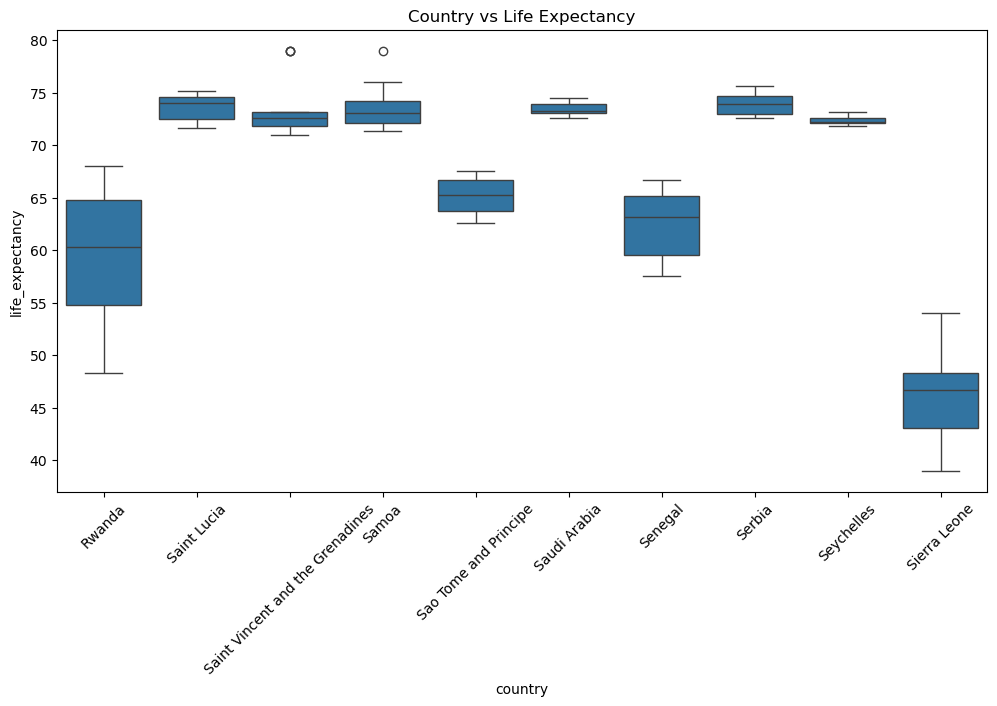

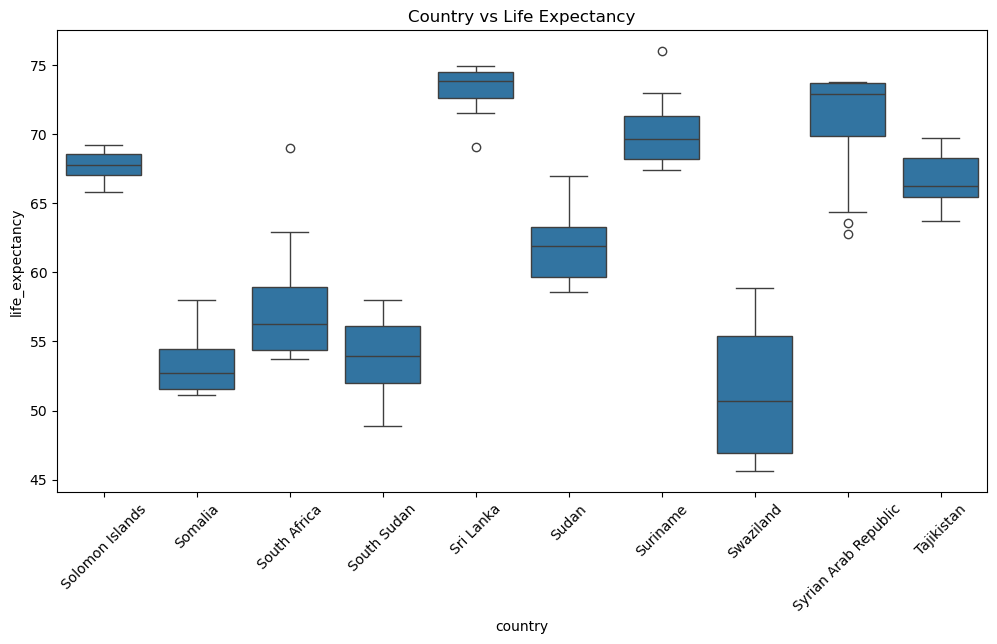

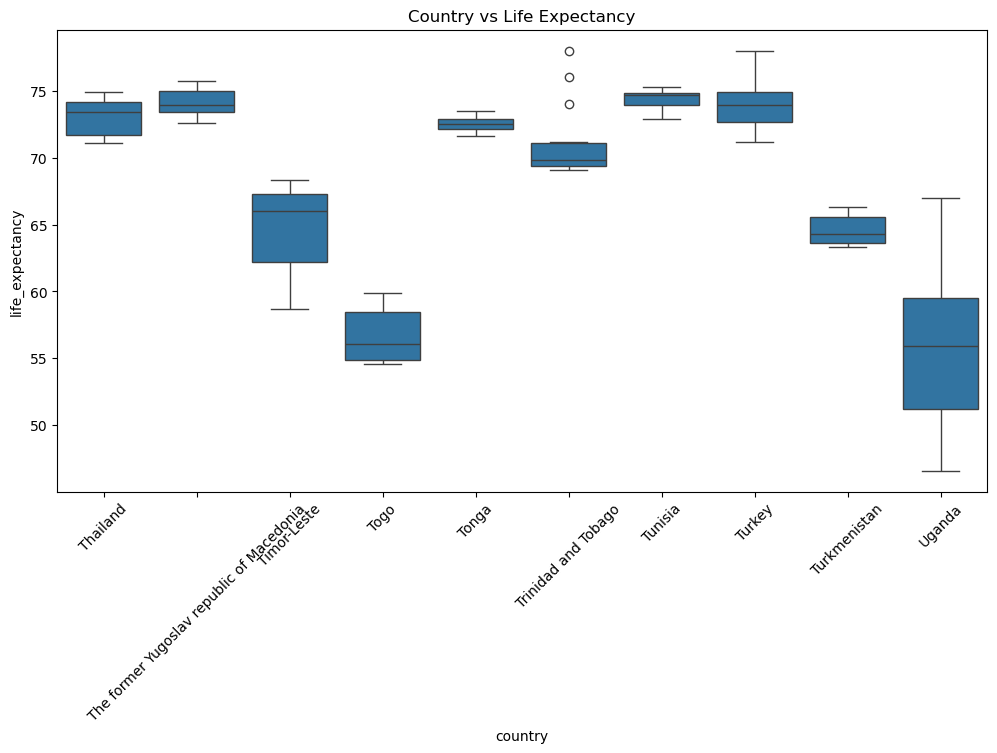

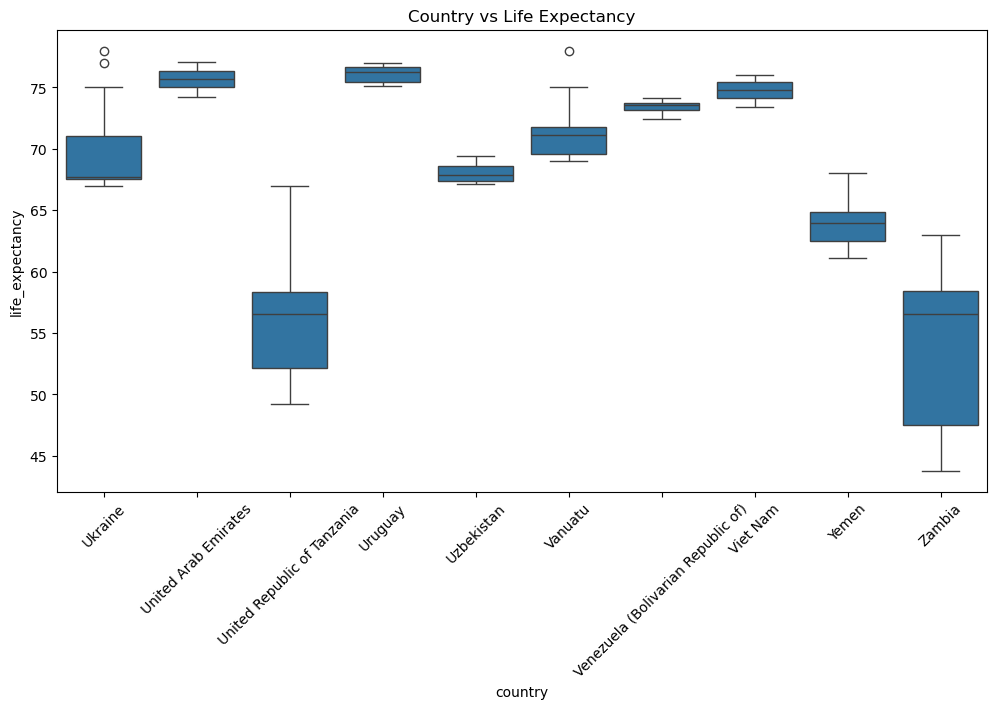

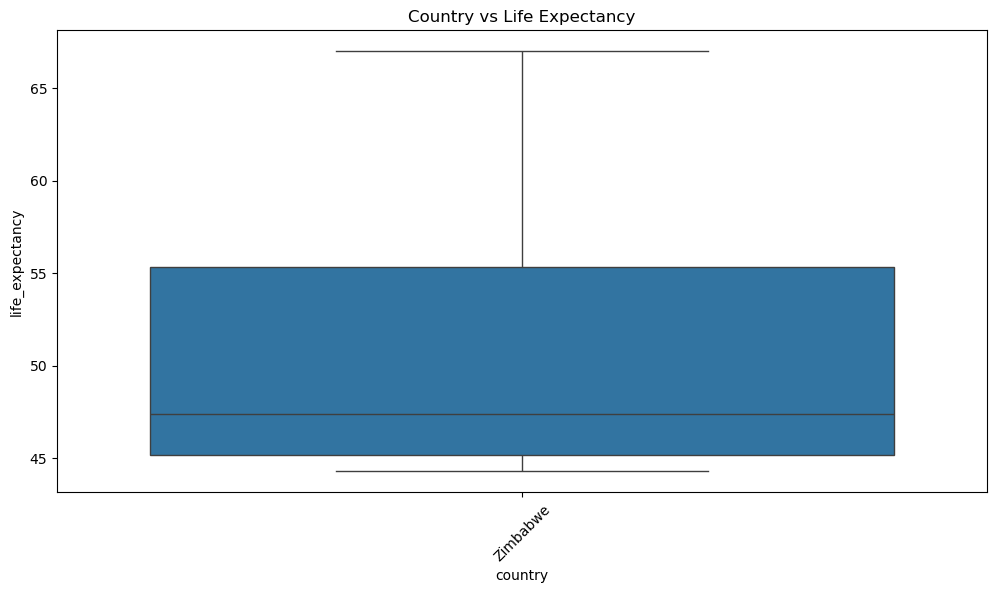

In [26]:
#Listado de paises unicos
#Iteraramos de 5 paises por grafica
countries = df_cleaned_target_status_deving.country.unique()

for i in range(0, len(countries), 10):
    plt.figure(figsize=(12, 6))
    subset_countries = countries[i:i+10]
    subset_data = df_cleaned_target_status_deving[df_cleaned_target_status_deving['country'].isin(subset_countries)]
    sns.boxplot(x='country', y='life_expectancy', data=subset_data)
    plt.title('Country vs Life Expectancy')
    plt.xticks(rotation=45)
    plt.show()

In [27]:
# Seleccionar las columnas numericas y generar una matrix de correlacion
numeric_cols = df_cleaned_target.select_dtypes(include=[np.number]).columns
correlation_matrix = df_cleaned_target[numeric_cols].corr()

In [28]:
correlation_matrix

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
year,1.000000,0.170033,-0.079052,-0.036464,-0.049175,0.032723,0.105898,-0.081840,0.104668,-0.041980,0.094498,0.087309,0.134817,-0.138789,0.102707,0.017199,-0.045082,-0.048152,0.242953,0.213265
life_expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
adult_mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant_deaths,-0.036464,-0.196557,0.078756,1.000000,-0.116647,-0.085906,-0.224750,0.501038,-0.227480,0.996628,-0.171063,-0.128826,-0.175539,0.024955,-0.108643,0.556781,0.465700,0.471340,-0.145018,-0.195202
alcohol,-0.049175,0.404877,-0.195848,-0.116647,1.000000,0.341112,0.086217,-0.052569,0.338253,-0.113388,0.222057,0.302902,0.222378,-0.049918,0.354406,-0.035376,-0.432302,-0.420862,0.450254,0.548001
percentage_expenditure,0.032723,0.381864,-0.242860,-0.085906,0.341112,1.000000,0.016704,-0.056831,0.231130,-0.088152,0.147664,0.176245,0.144022,-0.098230,0.899370,-0.025716,-0.252397,-0.253931,0.382244,0.391466
hepatitis_b,0.105898,0.256762,-0.162476,-0.224750,0.086217,0.016704,1.000000,-0.121211,0.155174,-0.234353,0.483989,0.070983,0.610199,-0.113395,0.083918,-0.123834,-0.122479,-0.127039,0.199141,0.222895
measles,-0.081840,-0.157586,0.031176,0.501038,-0.052569,-0.056831,-0.121211,1.000000,-0.176069,0.507718,-0.136460,-0.106405,-0.142174,0.030673,-0.076646,0.265936,0.224579,0.220836,-0.129465,-0.138344
bmi,0.104668,0.567694,-0.387017,-0.227480,0.338253,0.231130,0.155174,-0.176069,1.000000,-0.237910,0.287579,0.238765,0.286077,-0.243735,0.304442,-0.072051,-0.530805,-0.537784,0.509299,0.558363
under-five_deaths,-0.041980,-0.222529,0.094146,0.996628,-0.113388,-0.088152,-0.234353,0.507718,-0.237910,1.000000,-0.189137,-0.130355,-0.196083,0.037783,-0.112302,0.544401,0.467771,0.472244,-0.163185,-0.210945


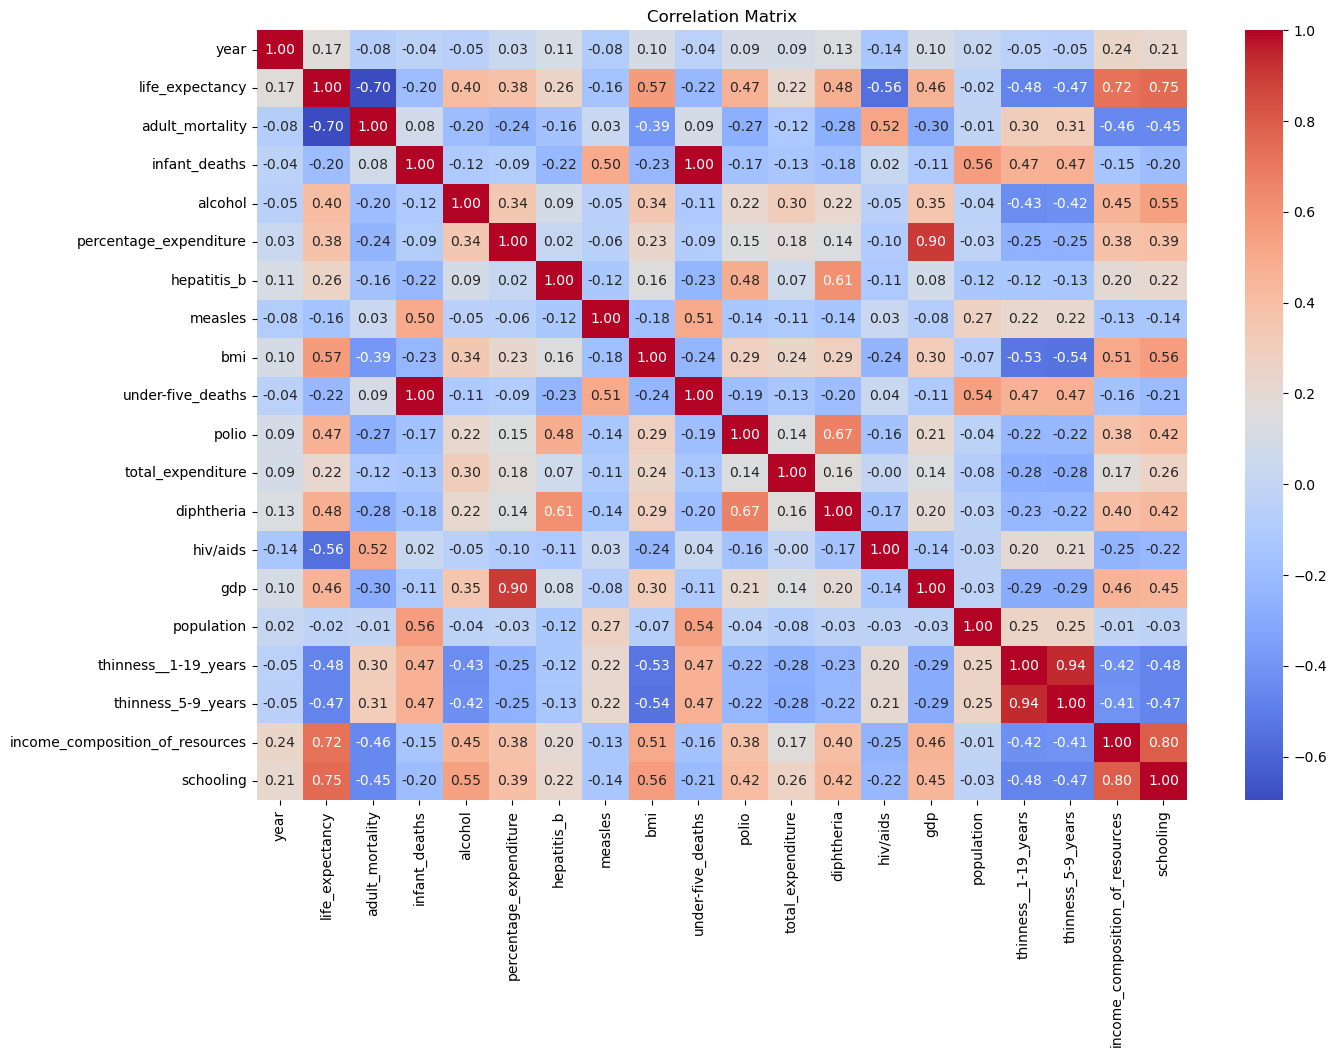

In [29]:
#correlacion entre variables numericas
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Mapping

In [30]:
countries = df_cleaned_target.country.unique()
status = df_cleaned_target.status.unique()

In [31]:
status

array(['Developing', 'Developed'], dtype=object)

In [32]:
# mapear cada pais a un numero entero

country_mapping = {country: idx for idx, country in enumerate(countries)}
status_mapping = {status: idx for idx, status in enumerate(status)}

In [33]:
df_cleaned_target['country_idx'] = df_cleaned_target['country'].map(country_mapping)
df_cleaned_target['status_idx'] = df_cleaned_target['status'].map(status_mapping)

C:\Users\ITPB-RH\AppData\Local\Temp\ipykernel_27288\2714970086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_target['country_idx'] = df_cleaned_target['country'].map(country_mapping)
C:\Users\ITPB-RH\AppData\Local\Temp\ipykernel_27288\2714970086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_target['status_idx'] = df_cleaned_target['status'].map(status_mapping)


In [34]:
df_cleaned_target.status_idx.unique()

array([0, 1])

In [35]:
df_cleaned_target.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,country_idx,status_idx
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,0


In [37]:
df_cleaned_target.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'country_idx', 'status_idx'],
      dtype='object')

In [42]:
# Imputation with scikit-learn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

In [43]:
# import pipeline
from sklearn.pipeline import Pipeline

steps = [('imputation', SimpleImputer())]
pipeline = Pipeline(steps)

In [44]:
df_numeric = df_cleaned_target[['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']]

In [45]:
df_numeric.isna().sum()

life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            193
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 32
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                443
population                         644
thinness__1-19_years                32
thinness_5-9_years                  32
income_composition_of_resources    160
schooling                          160
dtype: int64

In [46]:
df_numeric.describe()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [47]:
# llenamos columnas nullas con la media de cada columna
df_numeric_imputed = pd.DataFrame(pipeline.fit_transform(df_numeric), columns=df_numeric.columns)

In [48]:
#no se observan cambios
df_numeric_imputed.describe()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,9.523867,124.292079,118.114450,3.914923,1990.930605,22.531361,11485.970937,19.850184,160.700547,23.340548,2.385478,23.629576,5.085542,13157.128331,5.390628e+07,4.396597,4.484890,0.205131,3.253691
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,1.107500,4.853964,80.960842,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,72.100000,144.000000,3.000000,4.160000,65.611455,87.000000,17.000000,43.000000,4.000000,93.000000,5.930163,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,3.400000,0.662000,12.100000
75%,75.700000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7494.210719,1.276454e+07,7.100000,7.200000,0.773000,14.100000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [50]:
# 
df_data = pd.concat([df_cleaned_target[['country_idx', 'status_idx','year']].reset_index(drop=True), df_numeric_imputed.reset_index(drop=True)], axis=1)

In [51]:
df_data.head()

,country_idx,status_idx,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,0,0,2015,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,0,2014,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,0,2013,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,0,2012,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,0,2011,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Model

In [64]:
# split data by year, last year for validation

df_train = df_data[(df_data['year'] < 2015)]
df_val = df_data[(df_data['year'] >= 2015)]

In [65]:
# usamos cross validation para series de tiempo
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

X = df_train.drop('life_expectancy',axis=1)
y = df_train['life_expectancy']

In [66]:
tscv = TimeSeriesSplit(5)

In [67]:
# import Linear

from sklearn.linear_model import LinearRegression
model = LinearRegression()  
scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')

print(scores)

[0.39214108 0.67327318 0.81307972 0.72761124 0.82356   ]


In [68]:
# radomforestregressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()  

scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')

print(scores)

[0.85059394 0.86430623 0.92991308 0.8299717  0.90829412]


In [69]:
# import xgboost
import xgboost as xgb
model = xgb.XGBRegressor()  

scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')

print(scores)

[0.81763879 0.83245552 0.91539637 0.84890094 0.90802158]


## Results

Best models are XGBRegressor and RandomForestRegressor

In [70]:
# train_test_split

X_train = df_train[(df_train['year'] < 2014)].drop('life_expectancy', axis=1)
X_test = df_train[(df_train['year'] >= 2014)].drop('life_expectancy', axis=1)
y_train = df_train[(df_train['year'] < 2014)]['life_expectancy']
y_test = df_train[(df_train['year'] >= 2014)]['life_expectancy']

In [71]:
X_train.shape, X_test.shape

((2562, 21), (183, 21))

In [72]:
X_train.head()

,country_idx,status_idx,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2,0,0,2013,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,0,2012,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,0,2011,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,0,0,2010,279.0,74.0,0.01,79.679367,66.0,1989.0,16.7,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,0,0,2009,281.0,77.0,0.01,56.762217,63.0,2861.0,16.2,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9


# Model selection

# Bagging

In [73]:
# radomforestregressor
from sklearn.ensemble import RandomForestRegressor

In [75]:
n_estmimators = [10,20,35,50, 100, 200, 300, 400, 500]
max_depth = [10,15,20,25,30]

bagging_results = []

for n in n_estmimators:
    for depth in max_depth:
        model = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        print(f"Random Forest Regressor with {n} estimators and max depth {depth}: R² score = {score}")
        bagging_results.append({'estimators':n, 'depth':depth, 'score':score})

Random Forest Regressor with 10 estimators and max depth 10: R² score = 0.9289632352247221
Random Forest Regressor with 10 estimators and max depth 15: R² score = 0.9354097491356568
Random Forest Regressor with 10 estimators and max depth 20: R² score = 0.9334924494790009
Random Forest Regressor with 10 estimators and max depth 25: R² score = 0.9352470618098618
Random Forest Regressor with 10 estimators and max depth 30: R² score = 0.934982022220762
Random Forest Regressor with 20 estimators and max depth 10: R² score = 0.9332741626850881
Random Forest Regressor with 20 estimators and max depth 15: R² score = 0.9384453262101509
Random Forest Regressor with 20 estimators and max depth 20: R² score = 0.9386915234000257
Random Forest Regressor with 20 estimators and max depth 25: R² score = 0.9387649203105184
Random Forest Regressor with 20 estimators and max depth 30: R² score = 0.9383792139363268
Random Forest Regressor with 35 estimators and max depth 10: R² score = 0.9361564160789045


In [76]:
# generar dataframe desde bagging_results
df_bagging_results = pd.DataFrame(bagging_results)

In [77]:
df_bagging_results.pivot(index='estimators', columns='depth', values='score')

depth,10,15,20,25,30
estimators,,,,,
10,0.928963,0.935410,0.933492,0.935247,0.934982
20,0.933274,0.938445,0.938692,0.938765,0.938379
35,0.936156,0.941181,0.942412,0.942473,0.942179
50,0.937946,0.942502,0.943768,0.943657,0.943491
100,0.938743,0.944177,0.945436,0.945688,0.945371
200,0.939709,0.945514,0.946260,0.946403,0.946483
300,0.938922,0.945596,0.946016,0.945822,0.945884
400,0.938524,0.944734,0.945280,0.945047,0.945003
500,0.937995,0.944490,0.945135,0.944803,0.944904


In [78]:
# visualizar el mejor resultado
random_forest_best_result = df_bagging_results.loc[df_bagging_results['score'].idxmax()]
print("Mejor score", random_forest_best_result['score'])
print("Estimators:", random_forest_best_result['estimators'], "Depth:", random_forest_best_result['depth'])

Mejor score 0.9464834356193201
Estimators: 200.0 Depth: 30.0


## Gradient

In [79]:
# Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
n_estmimators = [50, 100, 200, 300, 400, 500]
learning_rates = [0.01, 0.05, 0.1, 0.2]
max_depths = [5, 7, 8]

gradboosting_results = []

for n in n_estmimators:
    for lr in learning_rates:
        for depth in max_depths:
            model = GradientBoostingRegressor(n_estimators=n, learning_rate=lr, max_depth=depth, random_state=42)
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            print(f"Gradient Boosting Regressor with {n} estimators, learning rate {lr}, and max depth {depth}: R² score = {score}")
            gradboosting_results.append({'estimators':n, 'learning_rate':lr, 'depth':depth, 'score':score})

Gradient Boosting Regressor with 50 estimators, learning rate 0.01, and max depth 5: R² score = 0.5194909306271991
Gradient Boosting Regressor with 50 estimators, learning rate 0.01, and max depth 7: R² score = 0.5305038021086511
Gradient Boosting Regressor with 50 estimators, learning rate 0.01, and max depth 8: R² score = 0.537711610513925
Gradient Boosting Regressor with 50 estimators, learning rate 0.05, and max depth 5: R² score = 0.9070985012063306
Gradient Boosting Regressor with 50 estimators, learning rate 0.05, and max depth 7: R² score = 0.9231210646835124
Gradient Boosting Regressor with 50 estimators, learning rate 0.05, and max depth 8: R² score = 0.9256910287630689
Gradient Boosting Regressor with 50 estimators, learning rate 0.1, and max depth 5: R² score = 0.9293070157293033
Gradient Boosting Regressor with 50 estimators, learning rate 0.1, and max depth 7: R² score = 0.9373370335041348
Gradient Boosting Regressor with 50 estimators, learning rate 0.1, and max depth 8:

In [82]:
# generar dataframe desde gradboosting_results
df_gradboosting_results = pd.DataFrame(gradboosting_results)

In [83]:
df_gradboosting_results.pivot(index='estimators', columns=['depth', 'learning_rate'], values='score')  

depth,5,7,8,5,7,8,5,7,8,5,7,8
learning_rate,0.01,0.01,0.01,0.05,0.05,0.05,0.10,0.10,0.10,0.20,0.20,0.20
estimators,,,,,,,,,,,,
50,0.519491,0.530504,0.537712,0.907099,0.923121,0.925691,0.929307,0.937337,0.939763,0.932094,0.945393,0.940792
100,0.752153,0.768004,0.775152,0.928855,0.938317,0.939106,0.935659,0.942289,0.941791,0.937123,0.948257,0.941628
200,0.889661,0.905074,0.905556,0.934812,0.942629,0.942041,0.943210,0.944726,0.942651,0.941359,0.948978,0.941928
300,0.918942,0.930277,0.929335,0.937290,0.943836,0.942310,0.944042,0.944983,0.942775,0.941410,0.949104,0.941932
400,0.926186,0.936928,0.934555,0.939632,0.944572,0.942418,0.945574,0.945170,0.942833,0.942649,0.949143,0.941935
500,0.930511,0.939697,0.936800,0.941230,0.945296,0.942521,0.945446,0.945253,0.942890,0.942780,0.949170,0.941937


In [84]:
# visualizar el mejor resultado
gradient_boosting_best_result = df_gradboosting_results.loc[df_gradboosting_results['score'].idxmax()]
print("Mejor score", gradient_boosting_best_result['score'])
print("Estimators:", gradient_boosting_best_result['estimators'], "Depth:", gradient_boosting_best_result['depth'], "Learning Rate:", gradient_boosting_best_result['learning_rate'])

Mejor score 0.9491703459113587
Estimators: 500.0 Depth: 7.0 Learning Rate: 0.2


In [85]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor

In [87]:
n_estmimators = [100, 200, 300, 400, 500]
learning_rates = [0.01, 0.05, 0.1, 0.2]
max_depths = [3, 5, 7]

adaboost_results = []

for n in n_estmimators:
    for lr in learning_rates:
        for depth in max_depths:
            model = AdaBoostRegressor(n_estimators=n, learning_rate=lr, random_state=42)
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            print(f"AdaBoost Regressor with {n} estimators, learning rate {lr}, max depth {depth}: R² score = {score}")
            adaboost_results.append({'estimators':n, 'learning_rate':lr, 'depth':depth, 'score':score})

AdaBoost Regressor with 100 estimators, learning rate 0.01, max depth 3: R² score = 0.8138446616936301
AdaBoost Regressor with 100 estimators, learning rate 0.01, max depth 5: R² score = 0.8138446616936301
AdaBoost Regressor with 100 estimators, learning rate 0.01, max depth 7: R² score = 0.8138446616936301
AdaBoost Regressor with 100 estimators, learning rate 0.05, max depth 3: R² score = 0.8370547220622123
AdaBoost Regressor with 100 estimators, learning rate 0.05, max depth 5: R² score = 0.8370547220622123
AdaBoost Regressor with 100 estimators, learning rate 0.05, max depth 7: R² score = 0.8370547220622123
AdaBoost Regressor with 100 estimators, learning rate 0.1, max depth 3: R² score = 0.8454731885068615
AdaBoost Regressor with 100 estimators, learning rate 0.1, max depth 5: R² score = 0.8454731885068615
AdaBoost Regressor with 100 estimators, learning rate 0.1, max depth 7: R² score = 0.8454731885068615
AdaBoost Regressor with 100 estimators, learning rate 0.2, max depth 3: R² s

In [88]:
# generar dataframe desde adaboost_results
df_adaboost_results = pd.DataFrame(adaboost_results)

In [89]:
df_adaboost_results.pivot(index='estimators', columns=['depth', 'learning_rate'], values='score')  

depth,3,5,7,3,5,7,3,5,7,3,5,7
learning_rate,0.01,0.01,0.01,0.05,0.05,0.05,0.10,0.10,0.10,0.20,0.20,0.20
estimators,,,,,,,,,,,,
100,0.813845,0.813845,0.813845,0.837055,0.837055,0.837055,0.845473,0.845473,0.845473,0.855942,0.855942,0.855942
200,0.824980,0.824980,0.824980,0.845792,0.845792,0.845792,0.852434,0.852434,0.852434,0.863258,0.863258,0.863258
300,0.829344,0.829344,0.829344,0.851789,0.851789,0.851789,0.857518,0.857518,0.857518,0.866015,0.866015,0.866015
400,0.834964,0.834964,0.834964,0.854187,0.854187,0.854187,0.865190,0.865190,0.865190,0.868476,0.868476,0.868476
500,0.838608,0.838608,0.838608,0.856773,0.856773,0.856773,0.865958,0.865958,0.865958,0.869238,0.869238,0.869238


In [90]:

adaboost_best_result = df_adaboost_results.loc[df_adaboost_results['score'].idxmax()]
print("Mejor score", adaboost_best_result['score'])
print("Estimators:", adaboost_best_result['estimators'], "Depth:", adaboost_best_result['depth'], "Learning Rate:", adaboost_best_result['learning_rate'])

Mejor score 0.8692384552097123
Estimators: 500.0 Depth: 3.0 Learning Rate: 0.2


## XBoost

In [92]:
# xboost
n_estmimators = [10,20,35,50, 100, 200, 300, 400, 500]
learning_rates = [0.01, 0.05, 0.1, 0.2]
max_depths = [3, 5, 7]

xgboost_results = []

for n in n_estmimators:
    for lr in learning_rates:
        for depth in max_depths:
            model = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = lr, max_depth = depth, n_estimators = n)
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            print(f"XGBoost Regressor with {n} estimators, learning rate {lr}, and max depth {depth}: R² score = {score}")
            xgboost_results.append({'estimators':n, 'learning_rate':lr, 'depth':depth, 'score':score})

XGBoost Regressor with 10 estimators, learning rate 0.01, and max depth 3: R² score = 0.06778560158261437
XGBoost Regressor with 10 estimators, learning rate 0.01, and max depth 5: R² score = 0.07998538682303036
XGBoost Regressor with 10 estimators, learning rate 0.01, and max depth 7: R² score = 0.07702022593531166
XGBoost Regressor with 10 estimators, learning rate 0.05, and max depth 3: R² score = 0.48504639945587114
XGBoost Regressor with 10 estimators, learning rate 0.05, and max depth 5: R² score = 0.5196253568791899
XGBoost Regressor with 10 estimators, learning rate 0.05, and max depth 7: R² score = 0.5225668415469276
XGBoost Regressor with 10 estimators, learning rate 0.1, and max depth 3: R² score = 0.7173538960705141
XGBoost Regressor with 10 estimators, learning rate 0.1, and max depth 5: R² score = 0.7619259295792105
XGBoost Regressor with 10 estimators, learning rate 0.1, and max depth 7: R² score = 0.7704666683366679
XGBoost Regressor with 10 estimators, learning rate 0.

In [93]:
df_xgboost_results = pd.DataFrame(xgboost_results)

In [94]:
df_xgboost_results.pivot(index='estimators', columns=['depth', 'learning_rate'], values='score')  

depth,3,5,7,3,5,7,3,5,7,3,5,7
learning_rate,0.01,0.01,0.01,0.05,0.05,0.05,0.10,0.10,0.10,0.20,0.20,0.20
estimators,,,,,,,,,,,,
10,0.067786,0.079985,0.077020,0.485046,0.519625,0.522567,0.717354,0.761926,0.770467,0.854460,0.887144,0.906088
20,0.203122,0.219522,0.217998,0.708234,0.753561,0.761116,0.856443,0.889538,0.904518,0.897635,0.922213,0.936302
35,0.361313,0.388532,0.386028,0.833752,0.873009,0.883165,0.897133,0.924192,0.934082,0.911789,0.930875,0.941872
50,0.479182,0.512915,0.515166,0.874506,0.906109,0.919292,0.909042,0.933676,0.940265,0.918503,0.933842,0.942935
100,0.702628,0.748226,0.755001,0.907347,0.932290,0.938349,0.923422,0.938164,0.946088,0.927928,0.935531,0.945594
200,0.850482,0.887210,0.897512,0.920473,0.937572,0.944398,0.929891,0.942763,0.949445,0.934955,0.936570,0.946421
300,0.887648,0.916925,0.927407,0.925300,0.939328,0.946139,0.932211,0.945857,0.950101,0.939577,0.938778,0.946726
400,0.901000,0.925210,0.935008,0.928023,0.941691,0.947224,0.934657,0.947853,0.950303,0.942841,0.938729,0.946751


In [95]:
# visualizar el mejor resultado
xgb_best_result = df_xgboost_results.loc[df_xgboost_results['score'].idxmax()]
print("Mejor score", xgb_best_result['score'])
print("Estimators:", xgb_best_result['estimators'], "Depth:", xgb_best_result['depth'], "Learning Rate:", xgb_best_result['learning_rate'])

Mejor score 0.9503033037843287
Estimators: 400.0 Depth: 7.0 Learning Rate: 0.1


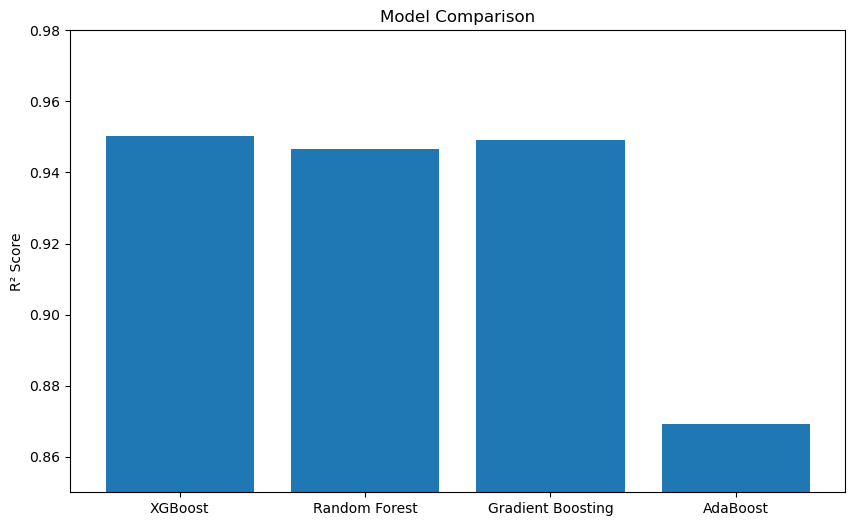

In [99]:
#graficamos con los mejores resultados de cada , valores entre 0.8 y 1.0 de R2 score, aumentamos el tamaño de imagen
import matplotlib.pyplot as plt
models = ['XGBoost', 'Random Forest', 'Gradient Boosting', 'AdaBoost']
scores = [xgb_best_result['score'], random_forest_best_result['score'], gradient_boosting_best_result['score'], adaboost_best_result['score']]
plt.figure(figsize=(10,6))
plt.bar(models, scores)
plt.ylim(0.85, 0.98)
plt.ylabel('R² Score')
plt.title('Model Comparison')
plt.show()

## Model

In [118]:
#model = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = 0.2, max_depth = 5, n_estimators = 500)
#model = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = 0.1, max_depth = 7, n_estimators = 35)
#400.0 Depth: 7.0 Learning Rate: 0.1
model = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = 0.1, max_depth = 7, n_estimators = 400)


In [119]:
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [120]:
y_pred = model.predict(X_test)

In [121]:
model.score(X_train, y_train)

0.999932543228612

In [125]:
model.score(X_test, y_test)

0.9503033037843287

In [128]:
y_predict = model.predict(X_test)

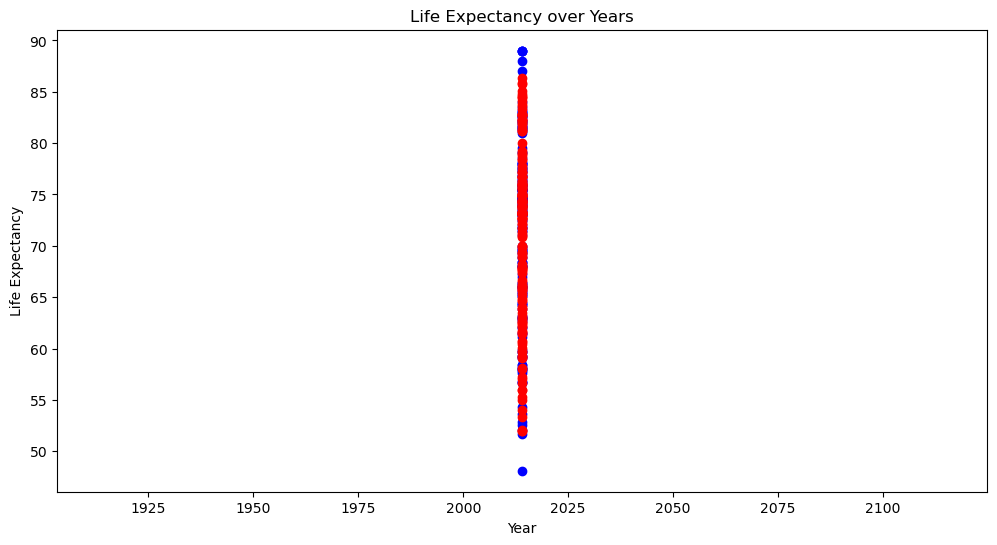

In [129]:
#grafica de linea data test entre years y media de life_expectancy

plt.figure(figsize=(12, 6))
plt.title('Life Expectancy over Years')    
plt.plot(X_test.year	, y_test, 'bo') 
plt.plot(X_test.year	, y_predict, 'ro')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
#pivot entre years y media de life_expectancy   
plt.show()


In [130]:
y_predict = model.predict(X_train)

In [131]:
# Crear dataframe para graficar resultados
df_grafica = pd.DataFrame({'year': X_train.year, 'actual_life_expectancy': y_train, 'predicted_life_expectancy': y_predict})

<Axes: title={'center': 'Life Expectancy: Actual vs Predicted'}, xlabel='Year', ylabel='Life Expectancy'>

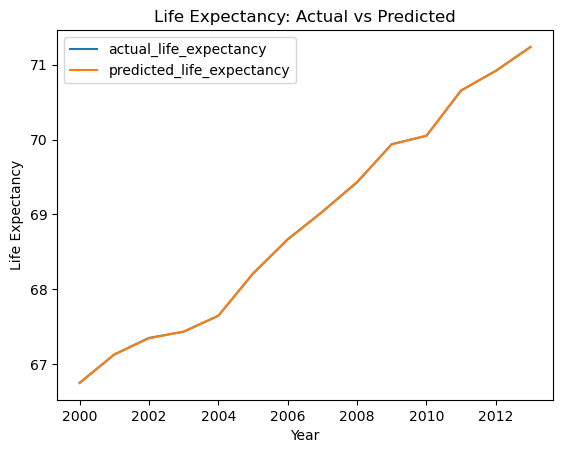

In [132]:
#pivot mean

df_p = df_grafica.pivot_table(values=['actual_life_expectancy', 'predicted_life_expectancy'], index='year', aggfunc='mean')

#df_grafica.plot(x='year', y=['actual_life_expectancy', 'predicted_life_expectancy'], title='Life Expectancy: Actual vs Predicted', ylabel='Life Expectancy', xlabel='Year')
df_p.plot(title='Life Expectancy: Actual vs Predicted', ylabel='Life Expectancy', xlabel='Year')

## Feautering

In [133]:
model.feature_importances_


array([9.2391163e-04, 1.5106729e-03, 2.3165520e-03, 3.6090489e-02,
       3.0781568e-03, 3.7687393e-03, 1.2983605e-03, 1.1678188e-03,
       6.9794379e-04, 3.5649147e-03, 4.0691596e-02, 2.6563609e-03,
       2.1207854e-03, 2.3386041e-03, 7.7222174e-01, 8.3930959e-04,
       1.5534605e-03, 4.5828586e-03, 7.6890723e-03, 9.6103303e-02,
       1.4785351e-02], dtype=float32)

In [134]:
model.get_booster().get_score(importance_type='total_gain')

{'country_idx': 4081.381591796875,
 'status_idx': 237.26536560058594,
 'year': 9593.7880859375,
 'adult_mortality': 160682.828125,
 'infant_deaths': 4636.064453125,
 'alcohol': 11539.2451171875,
 'percentage_expenditure': 3181.14794921875,
 'hepatitis_b': 1907.535888671875,
 'measles': 1377.733154296875,
 'bmi': 8569.46875,
 'under-five_deaths': 26304.001953125,
 'polio': 3768.033203125,
 'total_expenditure': 5403.05908203125,
 'diphtheria': 2211.531005859375,
 'hiv/aids': 773668.625,
 'gdp': 1408.408203125,
 'population': 3058.80859375,
 'thinness__1-19_years': 5977.970703125,
 'thinness_5-9_years': 6101.765625,
 'income_composition_of_resources': 187800.21875,
 'schooling': 28330.576171875}

In [135]:
model.get_booster().get_score(importance_type='gain')

{'country_idx': 1.5274631977081299,
 'status_idx': 2.497530221939087,
 'year': 3.829855442047119,
 'adult_mortality': 59.66685104370117,
 'infant_deaths': 5.08898401260376,
 'alcohol': 6.230693817138672,
 'percentage_expenditure': 2.1465234756469727,
 'hepatitis_b': 1.9307043552398682,
 'measles': 1.1538803577423096,
 'bmi': 5.893719673156738,
 'under-five_deaths': 67.2736587524414,
 'polio': 4.391646862030029,
 'total_expenditure': 3.5062031745910645,
 'diphtheria': 3.8663129806518555,
 'hiv/aids': 1276.680908203125,
 'gdp': 1.3875943422317505,
 'population': 2.5682692527770996,
 'thinness__1-19_years': 7.576642036437988,
 'thinness_5-9_years': 12.712011337280273,
 'income_composition_of_resources': 158.88343811035156,
 'schooling': 24.44398307800293}

In [136]:
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

hiv/aids                           0.772222
income_composition_of_resources    0.096103
under-five_deaths                  0.040692
adult_mortality                    0.036090
schooling                          0.014785
thinness_5-9_years                 0.007689
thinness__1-19_years               0.004583
alcohol                            0.003769
bmi                                0.003565
infant_deaths                      0.003078
polio                              0.002656
diphtheria                         0.002339
year                               0.002317
total_expenditure                  0.002121
population                         0.001553
status_idx                         0.001511
percentage_expenditure             0.001298
hepatitis_b                        0.001168
country_idx                        0.000924
gdp                                0.000839
measles                            0.000698
dtype: float32

#data

In [198]:
from sklearn.feature_selection import RFE

model_estimator = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = 0.1, max_depth = 7, n_estimators = 400)
rfe = RFE(estimator=model_estimator, n_features_to_select=0.75, verbose=1)
rfe.fit(X_train, y_train)

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


,estimator,"XGBRegressor(...ree=None, ...)"
,n_features_to_select,0.75
,step,1
,verbose,1
,importance_getter,'auto'
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None


In [199]:
X_train.columns[rfe.support_]

Index(['year', 'adult_mortality', 'infant_deaths', 'alcohol', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'population', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [200]:
X_train.iloc[:,rfe.support_]

,year,adult_mortality,infant_deaths,alcohol,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2,2013,268.0,66.0,0.01,18.1,89.0,62.0,8.13,64.0,0.1,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69.0,0.01,17.6,93.0,67.0,8.52,67.0,0.1,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71.0,0.01,17.2,97.0,68.0,7.87,68.0,0.1,2978599.0,18.2,18.2,0.454,9.5
5,2010,279.0,74.0,0.01,16.7,102.0,66.0,9.20,66.0,0.1,2883167.0,18.4,18.4,0.448,9.2
6,2009,281.0,77.0,0.01,16.2,106.0,63.0,9.42,63.0,0.1,284331.0,18.6,18.7,0.434,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2004,723.0,27.0,4.36,27.1,42.0,67.0,7.13,65.0,33.6,12777511.0,9.4,9.4,0.407,9.2
2924,2003,715.0,26.0,4.06,26.7,41.0,7.0,6.52,68.0,36.7,12633897.0,9.8,9.9,0.418,9.5
2925,2002,73.0,25.0,4.43,26.3,40.0,73.0,6.53,71.0,39.8,125525.0,1.2,1.3,0.427,10.0
2926,2001,686.0,25.0,1.72,25.9,39.0,76.0,6.16,75.0,42.1,12366165.0,1.6,1.7,0.427,9.8


In [202]:
# xboost
n_estmimators = [35,50, 100, 200, 300, 400, 500]
learning_rates = [0.01, 0.05, 0.1, 0.2]
max_depths = [3, 5, 7]

xgboost_results = []

for n in n_estmimators:
    for lr in learning_rates:
        for depth in max_depths:
            model = xgb.XGBRegressor(objective ='reg:squarederror',learning_rate = lr, max_depth = depth, n_estimators = n)
            model.fit(X_train.iloc[:,rfe.support_], y_train)
            score = model.score(X_test.iloc[:,rfe.support_], y_test)
            print(f"XGBoost Regressor with {n} estimators, learning rate {lr}, and max depth {depth}: R² score = {score}")
            xgboost_results.append({'estimators':n, 'learning_rate':lr, 'depth':depth, 'score':score})

XGBoost Regressor with 35 estimators, learning rate 0.01, and max depth 3: R² score = 0.36131317645143324
XGBoost Regressor with 35 estimators, learning rate 0.01, and max depth 5: R² score = 0.38743092881935937
XGBoost Regressor with 35 estimators, learning rate 0.01, and max depth 7: R² score = 0.38702204411418406
XGBoost Regressor with 35 estimators, learning rate 0.05, and max depth 3: R² score = 0.8337435113494424
XGBoost Regressor with 35 estimators, learning rate 0.05, and max depth 5: R² score = 0.8706790121792503
XGBoost Regressor with 35 estimators, learning rate 0.05, and max depth 7: R² score = 0.8833759051044662
XGBoost Regressor with 35 estimators, learning rate 0.1, and max depth 3: R² score = 0.8982470468293924
XGBoost Regressor with 35 estimators, learning rate 0.1, and max depth 5: R² score = 0.9237107047088335
XGBoost Regressor with 35 estimators, learning rate 0.1, and max depth 7: R² score = 0.9360550465671529
XGBoost Regressor with 35 estimators, learning rate 0.2

In [203]:
df_xgboost_results = pd.DataFrame(xgboost_results)

In [204]:
df_xgboost_results.pivot(index='estimators', columns=['depth', 'learning_rate'], values='score')  

depth,3,5,7,3,5,7,3,5,7,3,5,7
learning_rate,0.01,0.01,0.01,0.05,0.05,0.05,0.10,0.10,0.10,0.20,0.20,0.20
estimators,,,,,,,,,,,,
35,0.361313,0.387431,0.387022,0.833744,0.870679,0.883376,0.898247,0.923711,0.936055,0.910238,0.931202,0.943180
50,0.479182,0.511911,0.515710,0.874589,0.906168,0.917615,0.910124,0.932878,0.941757,0.917020,0.932408,0.944387
100,0.702628,0.746650,0.756828,0.909042,0.933572,0.937928,0.922652,0.939793,0.948462,0.929088,0.936144,0.947353
200,0.850447,0.886758,0.897659,0.921831,0.938870,0.943690,0.929506,0.944673,0.950470,0.935627,0.940299,0.948248
300,0.887907,0.916898,0.927095,0.925311,0.940791,0.945842,0.932946,0.945205,0.951369,0.938773,0.941490,0.948264
400,0.900566,0.925729,0.934669,0.927955,0.942464,0.946865,0.935649,0.945879,0.951625,0.941150,0.942000,0.948377
500,0.908206,0.931789,0.938579,0.928707,0.943576,0.947408,0.937508,0.947207,0.951741,0.942399,0.942050,0.948402


In [205]:
# visualizar el mejor resultado
xgb_best_result = df_xgboost_results.loc[df_xgboost_results['score'].idxmax()]
print("Mejor score", xgb_best_result['score'])
print("Estimators:", xgb_best_result['estimators'], "Depth:", xgb_best_result['depth'], "Learning Rate:", xgb_best_result['learning_rate'])

Mejor score 0.9517411454297142
Estimators: 500.0 Depth: 7.0 Learning Rate: 0.1


- Before RFE score 0.9503033037843287
- Estimators: 400.0 Depth: 7.0 Learning Rate: 0.1
- Attributes : 21

------

- After RFE score 0.9517411454297142
- Estimators: 500.0 Depth: 7.0 Learning Rate: 0.1
- Attributes : 15

In [206]:
X_test.iloc[9,rfe.support_].to_json()

'{"year":2014.0,"adult_mortality":119.0,"infant_deaths":5.0,"alcohol":0.01,"bmi":51.5,"under-five_deaths":6.0,"polio":97.0,"total_expenditure":6.4,"diphtheria":94.0,"hiv\\/aids":0.1,"population":953579.0,"thinness__1-19_years":2.8,"thinness_5-9_years":2.9,"income_composition_of_resources":0.752,"schooling":12.2}'

In [207]:
y_test[0:10]

1      59.9
17     77.5
33     75.4
49     51.7
65     76.2
81     76.2
97     74.6
113    82.7
129    81.4
145    72.5
Name: life_expectancy, dtype: float64

In [208]:
model_estimator.fit(X_train.iloc[:,rfe.support_],y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [209]:
columns = X_train.iloc[:,rfe.support_].columns

In [210]:
model_estimator.score(X_train[columns],y_train)

0.999915226988329

In [211]:
model_estimator.score(X_test[columns],y_test)

0.9516247925651201

Better score

In [212]:
y_predict = model_estimator.predict(X_test[columns])

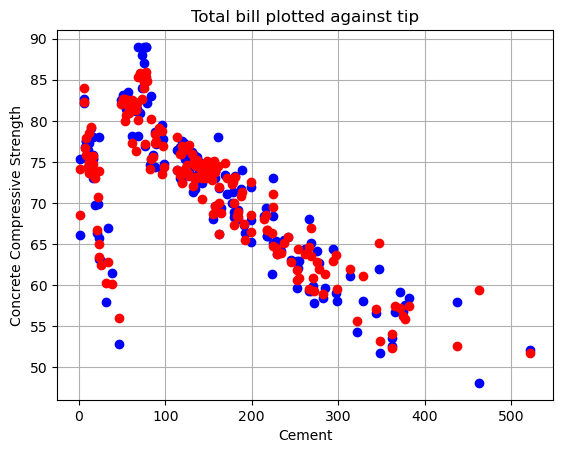

In [213]:
# Visualizacion de resultados
import matplotlib.pyplot as plt

plt.figure() 
plt.title('Total bill plotted against tip') 
plt.xlabel('Cement') 
plt.ylabel('Concrete Compressive Strength') 
plt.plot(X_test.adult_mortality	, y_test, 'bo') 

plt.plot(X_test.adult_mortality	, y_predict, 'ro') 
#plt.axis([0, 25, 0, 25]) 
plt.grid(True) 
plt.show()

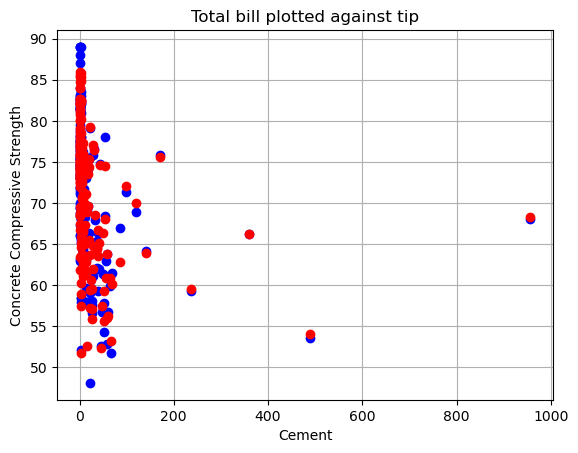

In [214]:
# grafica entre infant deaths and life expectancy
# Visualizacion de resultados
import matplotlib.pyplot as plt

plt.figure() 
plt.title('Total bill plotted against tip') 
plt.xlabel('Cement') 
plt.ylabel('Concrete Compressive Strength') 
plt.plot(X_test.infant_deaths	, y_test, 'bo') 

plt.plot(X_test.infant_deaths	, y_predict, 'ro') 
#plt.axis([0, 25, 0, 25]) 
plt.grid(True) 
plt.show()

## Save Model

In [215]:
#selected
columns

Index(['year', 'adult_mortality', 'infant_deaths', 'alcohol', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'population', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [216]:
#import pi
import pickle

In [217]:
with open('model/model_life_expectancy_edaix.pkl', 'wb') as f_out:
    pickle.dump((pipeline, model_estimator,columns.values, country_mapping, status_mapping), f_out)